In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [133]:
av_data = pd.read_csv("Data Part2/mp1_av_disengagements.csv")
print(av_data.shape)
av_data.head()

(1024, 7)


,Month,Car,Location,Weather,TypeOfTrigger,ReactionTime,Cause
0,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.58,Incorrect Traffic Light Detection
1,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.66,Adverse road surface conditions
2,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,1.93,Position Estimation Failure
3,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.65,Emergency Vehicle
4,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.64,Adverse road surface conditions


## Task 3

Given below are some assumptions that you will need to do the analysis for this task.
1. There can be at most one disengagement per mile.
2. The total amount of miles driven by all the AVs in the dataset is 505229 miles.
3. A day can be either clear or cloudy, but not both. The probability of a day being
clear in California is 72% [7].
4. The AV is equally likely to drive on a cloudy day as on a clear day
<br>
<br>
__________________________________________________
<br>

**1. Based on the above assumptions, answer the following questions on basic probability. (6 points)**

>**a. The assumption of at most one disengagement per mile allows us to treat
the occurrence of a disengagement in a mile as a random variable with a
__ __BERNOULLI__ __ distribution**

>**b. Based on the above assumptions, calculate the probability of
disengagement per mile on a cloudy day. (1 point)**

In [134]:
## 1024 disengagements / 505229 miles
p_disengagement = 1024/505229
p_cloudy_given_disengagement = av_data[av_data['Weather']=='cloudy'].shape[0] / 1024

## P(Disengagement | Cloudy) = P(Cloudy | Disengagement) * P(Disengagement) / P(Cloudy)
p_disengagement_given_cloudy = (p_cloudy_given_disengagement*p_disengagement)/(1-0.72)
print("Probability of Disengagement Per Mile: ",p_disengagement)
print("Probability of Disengagement Per Mile on a Cloudy Day: ",p_disengagement_given_cloudy)

Probability of Disengagement Per Mile:  0.002026803687040926
Probability of Disengagement Per Mile on a Cloudy Day:  0.00590255677552725


>**c. Based on the above assumptions, calculate the probability of
disengagement per mile on a clear day. (1 point)**

In [135]:
p_clear_given_disengagement = av_data[av_data['Weather']=='clear'].shape[0] / 1024

p_disengagement_given_clear = (p_clear_given_disengagement*p_disengagement)/(0.72)
print("Probability of Disengagement Per Mile on a Clear Day: ",p_disengagement_given_clear)

Probability of Disengagement Per Mile on a Clear Day:  0.0005195663748517999


>**d. Similarly, calculate the probability of an automatic disengagement per mile
on a cloudy day, and the probability of an automatic disengagement per mile on a
clear day. (1 point)**

In [136]:
automatic_disengagements = av_data[av_data['TypeOfTrigger']=='automatic']

p_automatic_disengagement = automatic_disengagements.shape[0] / 505229
p_cloudy_given_automatic_disengagement = automatic_disengagements[automatic_disengagements['Weather']=='cloudy'].shape[0]/  \
                                            automatic_disengagements.shape[0]
p_clear_given_automatic_disengagement = automatic_disengagements[automatic_disengagements['Weather']=='clear'].shape[0]/  \
                                            automatic_disengagements.shape[0]
                                            
p_automatic_disengagement_given_cloudy = (p_cloudy_given_automatic_disengagement*p_automatic_disengagement)/(1-0.72)
p_automatic_disengagement_given_clear = (p_clear_given_automatic_disengagement*p_automatic_disengagement)/(0.72)

print("Probability of Automatic Disengagement Per Mile: ",p_automatic_disengagement)
print("Probability of Automatic Disengagement Per Mile on Cloudy Day: ",p_automatic_disengagement_given_cloudy)
print("Probability of Automatic Disengagement Per Mile on Cloudy Day: ",p_automatic_disengagement_given_clear)

Probability of Automatic Disengagement Per Mile:  0.0009757951344835708
Probability of Automatic Disengagement Per Mile on Cloudy Day:  0.0028063653172267283
Probability of Automatic Disengagement Per Mile on Cloudy Day:  0.00026390673008345393


>**e. How likely is it that there are 100 or more disengagements in 10,000 miles
under cloudy conditions? (hint: use Central Limit Theorem) (2 points)**

In [137]:
import scipy

Given Random variable $X_i$ ~ Bernoulli($p = 0.0059$), we know that as $n \rightarrow \infty$:

$P(\frac{\sum{X_i} - n\mu}{\sigma\sqrt{n}} \leq a) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{a} e^{\frac{-x^2}{2}} dx$ 

We want: $P(X_1 + ... + X_{10000} \geq 100) = 1 - P(X_1 + ... + X_{10000} \leq 99)$

To achieve the form above, have that: $\sum(X_i) \leq (\sigma\sqrt{n})a + n\mu = 99$ 

With $n=10000, \ \mu = p = 0.0059, \ \sigma = \sqrt{p(1-p)} = 0.0766$

In [138]:
n = 10000
p = 0.0059
sigma = 0.0766

A = (99 - (n*p))/(sigma*np.sqrt(n))
print("a =",A)

prob = 1 - ( (1/np.sqrt(2*np.pi)) * scipy.integrate.quad(func=lambda x: np.exp((x**2)/-2),
                                                  a=-np.inf,b=A)[0] )
print("Probability of 100 or more disengagements in 10000 miles =",round(prob,10))

a = 5.221932114882507
Probability of 100 or more disengagements in 10000 miles = 8.85e-08


**2. Assuming that the disengagement per mile is a random variable with the
distribution you answered in Task 3.1.a, and the weather condition is cloudy. (6
points)**

Disengagement per mile $X$ ~ Bernoulli $(p=0.0059)$

>**a. What is the distribution of “the number of miles until the next
disengagement”? Explain your reasoning. Calculate and state the values of the
parameters of the distribution. (1 points)**

This would follow a geometric distribution, as this distribution captures the waiting time until the first occurance of an event -- in this case, a disengagement. Our 'waiting time' in this scenario is miles driven. After each occurance, we 'reset' with a new random variable, so that our random variable always represents the time before the first disengagement in its lifetime. 

$X$ ~ Geom $(p=0.0059)$

$\mu = \frac{1}{p} = 169.4915$

$\sigma = \sqrt{\frac{1-p}{p^2}} = 168.9908$

>**b. What is the distribution of “the number of disengagements in 10,000 miles”?
(hint: this is equivalent to drawing n=10,000 independent trials from the
distribution of disengagement per mile you calculated from Task 3.1.a). Calculate
and state the values of the parameters of the distribution. (1 points)**

This would follow a binomial distribution, as it is simply a yes/no decision, but with $n=10000$ trials. 

$X$ ~ Binom $(n=10000,p=0.0059)$

>**c. Notice that the number of disengagements “𝒏" in Task 3.2.b is large while
the probability of disengagement per mile "𝒑" is very small, what distribution does
your answer in Task 3.2.b approximate? Calculate and state the values of the
parameters of the distribution. (1 points)**

This would approximate a Poisson distribution where $\lambda = np = 59$

>**d. Plot the probability mass function (PMF) of the distribution in Task 3.2.b and
Task 3.2.c for: 1 - The x-axis ranging between 0 and 10000. 2 - The x-axis ranging between 0 and 100.
Describe the plots and discuss your findings. (2 points)**

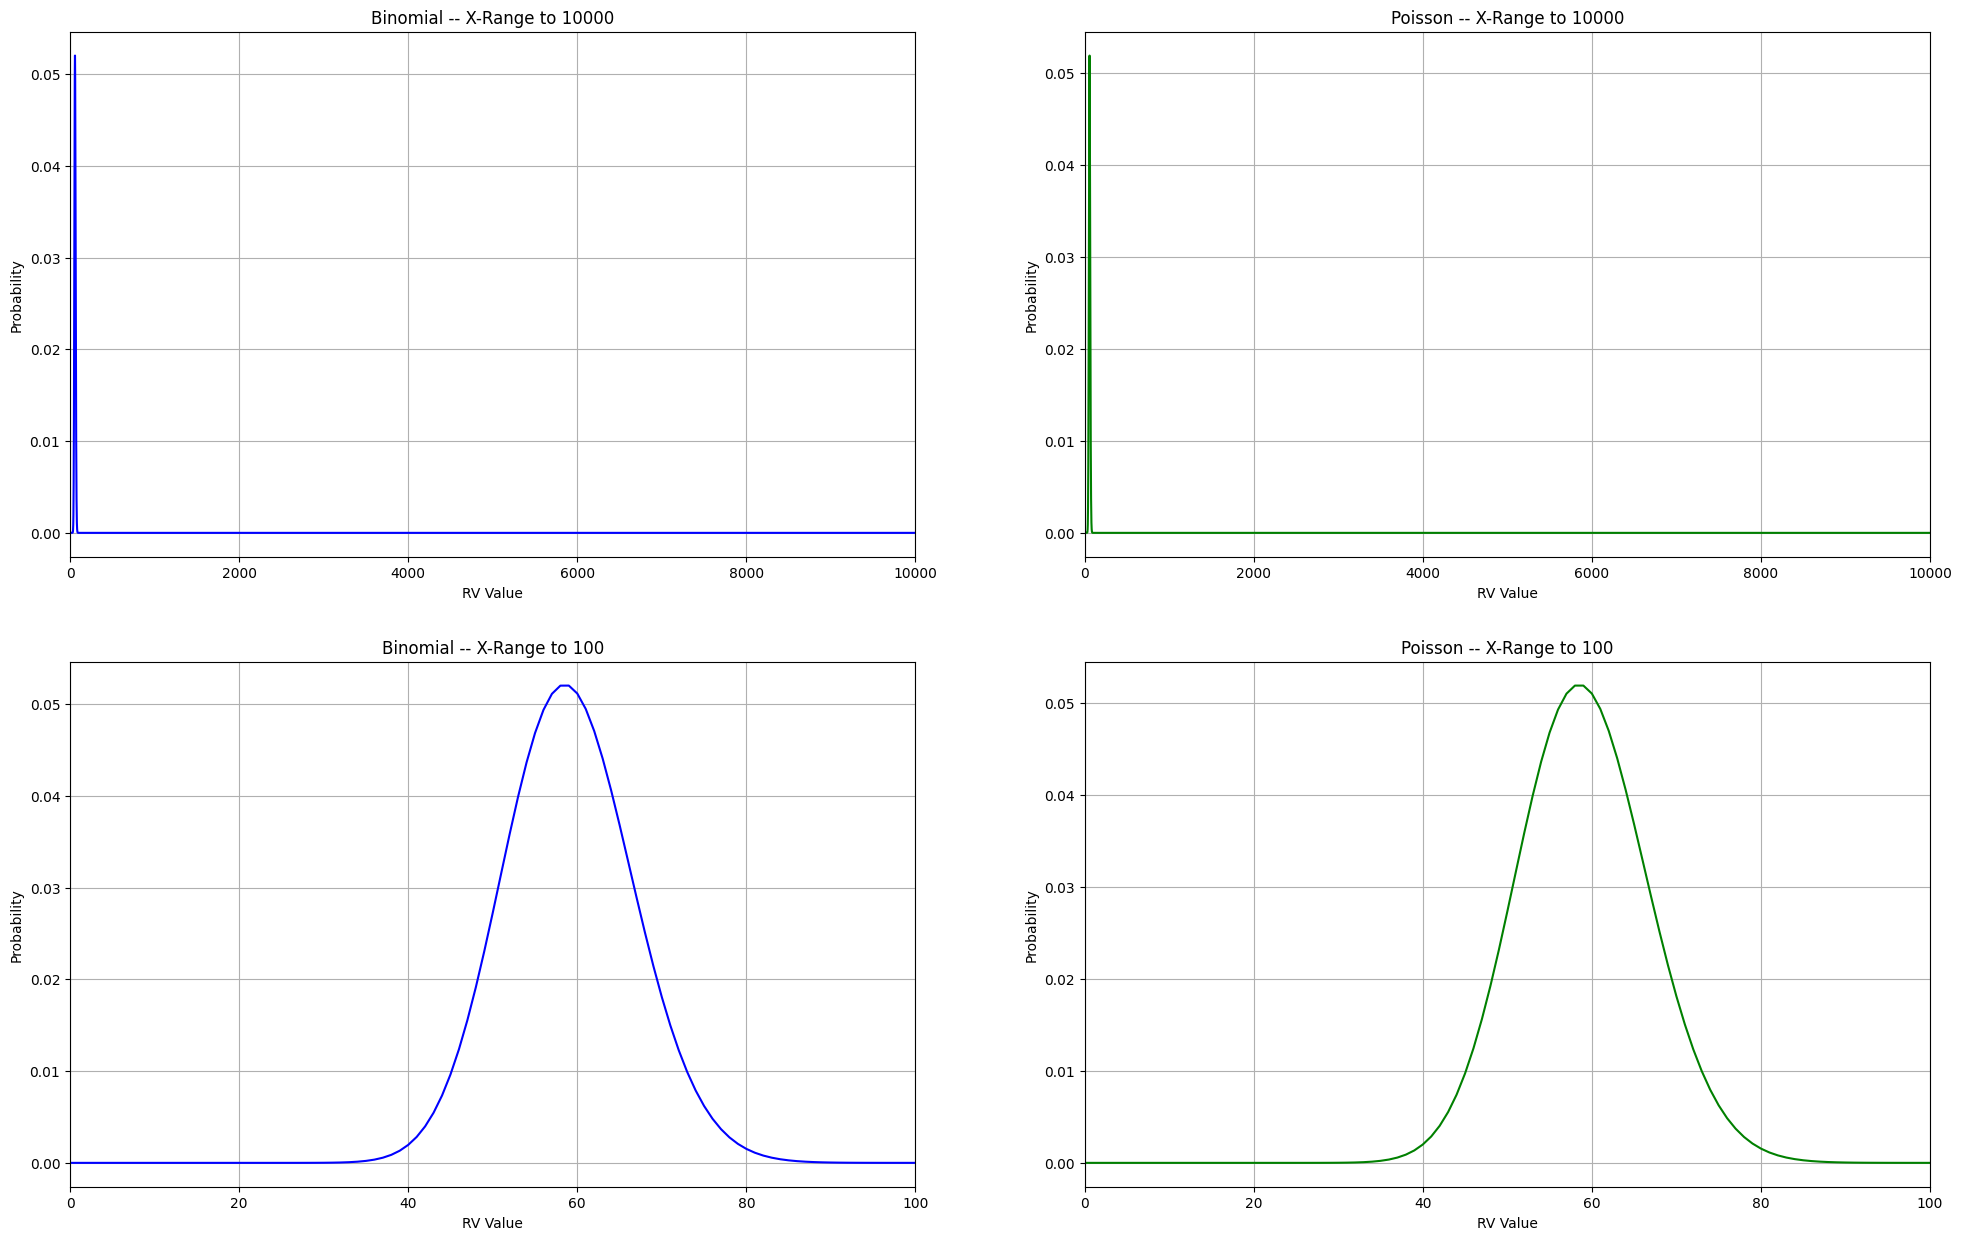

In [139]:
## 1
n = 10000
p = 0.0059
lam = 59

x = np.arange(0,n+1,1)
y_binom = scipy.stats.binom.pmf(x,n,p)
y_pois = scipy.stats.poisson.pmf(x,lam)

fig, axs = plt.subplots(2, 2, figsize=(24,15))

axs[0][0].plot(x, y_binom, 'blue', ms=2)
axs[0][0].set_title('Binomial -- X-Range to 10000')
axs[0][0].set_xlim(0,10000)
axs[0][0].set_xlabel('RV Value')
axs[0][0].set_ylabel('Probability')
axs[0][0].grid()

axs[0][1].plot(x, y_pois, 'green', ms=2)
axs[0][1].set_title('Poisson -- X-Range to 10000')
axs[0][1].set_xlim(0,10000)
axs[0][1].set_xlabel('RV Value')
axs[0][1].set_ylabel('Probability')
axs[0][1].grid()

axs[1][0].plot(x, y_binom, 'blue', ms=2)
axs[1][0].set_title('Binomial -- X-Range to 100')
axs[1][0].set_xlim(0,100)
axs[1][0].set_xlabel('RV Value')
axs[1][0].set_ylabel('Probability')
axs[1][0].grid()

axs[1][1].plot(x, y_pois, 'green', ms=2)
axs[1][1].set_title('Poisson -- X-Range to 100')
axs[1][1].set_xlim(0,100)
axs[1][1].set_xlabel('RV Value')
axs[1][1].set_ylabel('Probability')
axs[1][1].grid()

plt.show()


*****TODO: Discuss Findings*****

>**e. Solve Task 3.1.e by using the cumulative distribution function (CDF) of the
distribution you computed in Task 3.2.c and compare the results. Discuss your
findings. (1 points)**

In [140]:
value = scipy.stats.poisson.pmf(100,lam)
print("Self-Calculated Value: ",round(prob,10))
print("Distribution-Calculated Value: ",round(value,10))

Self-Calculated Value:  8.85e-08
Distribution-Calculated Value:  3.103e-07


These findings make sense, as the expectation for disengagements in 10000 miles driven, considering both the poisson and binomial distributions, was 59. One hundred disengagements is well outside of the range of reasonable values. 

**3. What’s the conditional probability that the reaction time is: (4 points)**

>**a. Greater than 0.4s given that the weather was cloudy? Reaction time is
measured only in cases where there was an automatic disengagement. (2
points)**

In [141]:
automatic_disengagements.head()

,Month,Car,Location,Weather,TypeOfTrigger,ReactionTime,Cause
0,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.58,Incorrect Traffic Light Detection
1,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.66,Adverse road surface conditions
2,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,1.93,Position Estimation Failure
3,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.65,Emergency Vehicle
4,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.64,Adverse road surface conditions


In [142]:
P_cloudy = automatic_disengagements[automatic_disengagements['Weather']=='cloudy'].shape[0]/ \
            automatic_disengagements.shape[0]

rt_greater = automatic_disengagements[automatic_disengagements['ReactionTime']>0.4]
P_cloudy_given_greater = rt_greater[rt_greater['Weather']=='cloudy'].shape[0]/ \
                        rt_greater.shape[0]
                    
P_rt_greater = automatic_disengagements[automatic_disengagements['ReactionTime']>0.4].shape[0]/ \
                automatic_disengagements.shape[0]
                         
P_rt_greater_given_cloudy = (P_cloudy_given_greater*P_rt_greater) / (P_cloudy)
print("Probability of reaction time greater than 0.4 seconds, given cloudy weather: ", \
        P_rt_greater_given_cloudy)

Probability of reaction time greater than 0.4 seconds, given cloudy weather:  0.6120906801007557


>**b. Greater than 0.7s given that the weather was clear? Reaction time is
measured only in cases where there was an automatic disengagement. (2
points)**

In [143]:
P_clear = automatic_disengagements[automatic_disengagements['Weather']=='clear'].shape[0]/ \
            automatic_disengagements.shape[0]

rt_greater = automatic_disengagements[automatic_disengagements['ReactionTime']>0.7]
P_clear_given_greater = rt_greater[rt_greater['Weather']=='clear'].shape[0]/ \
                        rt_greater.shape[0]
                    
P_rt_greater = automatic_disengagements[automatic_disengagements['ReactionTime']>0.7].shape[0]/ \
                automatic_disengagements.shape[0]
                         
P_rt_greater_given_clear = (P_clear_given_greater*P_rt_greater) / (P_clear)
print("Probability of reaction time greater than 0.7 seconds, given clear weather: ", \
        P_rt_greater_given_clear)

Probability of reaction time greater than 0.7 seconds, given clear weather:  0.3854166666666667


**4. A study found that an automatic AV disengagement will result in an accident if
the human driver is slow in reacting. Following reactions are considered slow: (i) a
reaction time greater than 0.4s under cloudy conditions and, (ii) a reaction time
greater than 0.7s under clear conditions. Find the probability of an accident per mile
due to automatic AV disengagement and slow reaction. (2 points)**


    P(accident) = P(slow reaction) * P(autodisengagement)
    ASSUMING: disengagement + slow reaction ==> accident (always)

    P(slow reaction) = P(slow reaction|cloudy)*p(cloudy) + P(slow react|clear)*P(clear)

In [144]:
p_slow_react = (P_rt_greater_given_clear*P_clear) + (P_rt_greater_given_cloudy*P_cloudy)
p_automatic_disengagement_per_mile = 0.0059

p_accident = p_automatic_disengagement_per_mile * p_slow_react
print("Probability of an accident: ",p_accident)

Probability of an accident:  0.0033509127789046653


**5. Next, you will investigate how to diagnose the cause of an AV disengagement
based on new observations. (4 points)**
>**a. An AV had a disengagement with a reaction time greater than 0.4s on a
cloudy day. What is the posterior probability that the root cause of the
disengagement was “Software Froze”? (2 points)**

P(SF | slow rt, cloudy) = P(slow rt, cloudy | SF) * P(SF) / P(slow rt, cloudy)

In [145]:
sf_disengagement = automatic_disengagements[automatic_disengagements['Cause']=="Software Froze"]
p_sf = sf_disengagement.shape[0] / automatic_disengagements.shape[0]
p_slow_cloudy = automatic_disengagements[(automatic_disengagements['Weather']=='cloudy') & (automatic_disengagements['ReactionTime']>0.4)].shape[0] / automatic_disengagements.shape[0]
p_slow_cloudy_given_sf = sf_disengagement[(sf_disengagement['Weather']=='cloudy') & (sf_disengagement['ReactionTime']>0.4)].shape[0] / sf_disengagement.shape[0]
p_software_froze_given_slow_react_cloudy = p_slow_cloudy_given_sf*p_sf/p_slow_cloudy

# Using Counts (same answer)
# slow_react_cloudy_dataframe = automatic_disengagements[(automatic_disengagements['Weather']=='cloudy') & (automatic_disengagements['ReactionTime']>0.4)]
# p_software_froze_given_slow_react_cloudy = (slow_react_cloudy_dataframe[slow_react_cloudy_dataframe['Cause']=="Software Froze"].shape[0]) / slow_react_cloudy_dataframe.shape[0]

print("Posterior probability (Slow, Software Froze, Cloudy): ", p_software_froze_given_slow_react_cloudy)

Posterior probability (Slow, Software Froze, Cloudy):  0.053497942386831275


>**b. What is the posterior probability that the root cause of the disengagement
was “Software Froze if the disengagement happened on a clear day with reaction
time greater than 0.7s. Based on the probabilities calculated in Tasks 3.5.a and
3.5.b, discuss your findings. (2 points)**

In [146]:
sf_disengagement = automatic_disengagements[automatic_disengagements['Cause']=="Software Froze"]
p_sf = sf_disengagement.shape[0] / automatic_disengagements.shape[0]
p_slow_clear = automatic_disengagements[(automatic_disengagements['Weather']=='clear') & (automatic_disengagements['ReactionTime']>0.7)].shape[0] / automatic_disengagements.shape[0]
p_slow_clear_given_sf = sf_disengagement[(sf_disengagement['Weather']=='clear') & (sf_disengagement['ReactionTime']>0.7)].shape[0] / sf_disengagement.shape[0]
p_software_froze_given_slow_react_clear = p_slow_clear_given_sf*p_sf/p_slow_clear

# Using Counts (same answer)
# slow_react_clear_dataframe = automatic_disengagements[(automatic_disengagements['Weather']=='clear') & (automatic_disengagements['ReactionTime']>0.7)]
# p_software_froze_given_slow_react_clear = (slow_react_clear_dataframe[slow_react_clear_dataframe['Cause']=="Software Froze"].shape[0]) / slow_react_clear_dataframe.shape[0]

print("Posterior probability (Slow, Software Froze, Clear): ", p_software_froze_given_slow_react_clear)

Posterior probability (Slow, Software Froze, Clear):  0.24324324324324326


TODO: Add Findings

**6. In this question, you will construct a Naive Bayes model to infer the root cause of
disengagement scenarios of AVs. Naive Bayes assumes that the factors are class
conditionally independent. We assume that both Location (urban-street or highway)
and Weather (cloudy or clear) are factors related to the Cause (consider the Cause
has 3 different values, “Software Froze”, “Hardware Fault” or “Other”), and Location
and Weather are independent given the Cause. Answer the following questions: (8
points)**
>**a. Draw a graph for the Naive Bayes model described in the question. (2
points)**

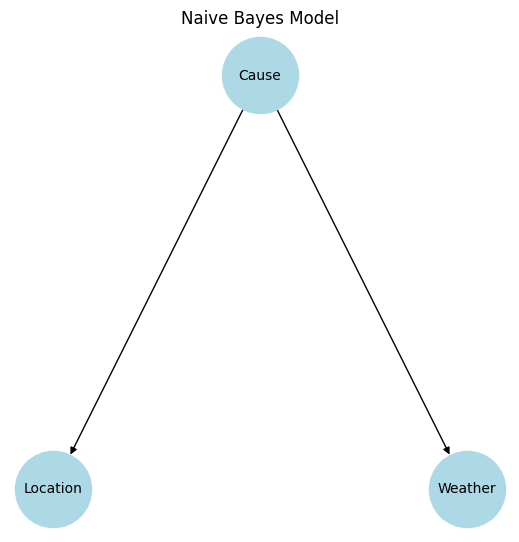

In [147]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

edges = [
    ('Cause', 'Location'), ('Cause', 'Weather') # A is the root node
]
G.add_edges_from(edges)

# Manually define positions
pos = {
    'Cause': (0, 1),
    'Location': (-1, 0),
    'Weather': (1, 0),
}

plt.figure(figsize=(5, 5))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=10, arrows=True)

plt.title('Naive Bayes Model')
plt.show()


>**b. Count the number of parameters needed to define the Naive Bayes model
(including the prior and the conditional probability distributions). (2 points)**

Arbitrary Joint Distribution:  
(3 * 2 * 2) - 1 = 11 parameters

Naive Bayes Model:

P(C,L,W) = P(L|O)P(W|O)P(O)

P(L = urban-street | O = Software Froze), P(L = urban-street | O = Hardware Fault), P(L = urban-street | O = Other),

P(W = cloudy | O = Software Froze), P(W = cloudy | O = Hardware Fault), P(W = cloudy | O = Other),

P(O = Software Froze), P(O = Hardware Fault)

**8 Parameters**

>**c. Based on the number of parameters needed, derive, and show the
conditional probability tables and prior probability from the given dataset to infer
the Cause. (2 points)**

In [148]:
## Priors ##

# P(O = Software Froze)
sf_dataframe = automatic_disengagements[automatic_disengagements['Cause']=="Software Froze"]
p_sf = sf_dataframe.shape[0] / automatic_disengagements.shape[0]
print(p_sf)

# P(O = Hardware Fault)
hf_dataframe = automatic_disengagements[automatic_disengagements['Cause']=="Hardware Fault"]
p_hf = hf_dataframe.shape[0] / automatic_disengagements.shape[0]
print(p_hf)

# --- infered from  required parameters --- #

# P(O = Other)
o_dataframe = automatic_disengagements[(automatic_disengagements['Cause']!="Software Froze") & (automatic_disengagements['Cause']!="Hardware Fault")]
# p_o = o_dataframe.shape[0] / automatic_disengagements.shape[0]
p_o = 1 - p_sf - p_hf
print(p_o)

0.09939148073022312
0.10141987829614604
0.7991886409736308


In [149]:
## Conditional Probabilities ##

# P(L = urban-street | O = Software Froze)
p_us_given_sf = sf_dataframe[sf_dataframe['Location']=='urban-street'].shape[0] / sf_dataframe.shape[0]
# P(L = urban-street | O = Hardware Fault)
p_us_given_hf = hf_dataframe[hf_dataframe['Location']=='urban-street'].shape[0] / hf_dataframe.shape[0]
# P(L = urban-street | O = Other)
p_us_given_o = o_dataframe[o_dataframe['Location']=='urban-street'].shape[0] / o_dataframe.shape[0]

# P(W = cloudy | O = Software Froze)
p_cloudy_given_sf = sf_dataframe[sf_dataframe['Weather']=='cloudy'].shape[0] / sf_dataframe.shape[0]
# P(W = cloudy | O = Hardware Fault)
p_cloudy_given_hf = hf_dataframe[hf_dataframe['Weather']=='cloudy'].shape[0] / hf_dataframe.shape[0]
# P(W = cloudy | O = Other)
p_cloudy_given_o = o_dataframe[o_dataframe['Weather']=='cloudy'].shape[0] / o_dataframe.shape[0]

# --- infered from  required parameters --- #

# P(L = highway | O = Software Froze)
p_h_given_sf = 1 - p_us_given_sf
# P(L = highway | O = Hardware Fault)
p_h_given_hf = 1 - p_us_given_hf
# P(L = highway | O = Other)
p_h_given_o = 1 - p_us_given_o

# P(W = clear | O = Software Froze)
p_clear_given_sf = 1 - p_cloudy_given_sf
# P(W = clear | O = Hardware Fault)
p_clear_given_hf = 1 - p_cloudy_given_hf
# P(W = clear | O = Other)
p_clear_given_o = 1 - p_cloudy_given_o

>**d. According to the conditional probability tables you derived, what is the most
probable root cause of disengagement given the Weather was cloudy and the
Location was urban-street. (2 points)**

In [150]:
# given L = urban-street and W = cloudy

# Software Freeze
score_sf_given_us_cloudy = p_sf * p_us_given_sf * p_cloudy_given_sf
print(score_sf_given_us_cloudy)

# Hardware Fault
score_hf_given_us_cloudy = p_hf * p_us_given_hf * p_cloudy_given_hf
print(score_hf_given_us_cloudy)

# Other
score_o_given_us_cloudy = p_o * p_us_given_o * p_cloudy_given_o
print(score_o_given_us_cloudy)

0.038539553752535496
0.03975659229208925
0.7261663286004056


Therefore **Other** root cause is most probable given Weather was cloudy and the Location was urban-street